In [443]:
import glob
import cv2
import matplotlib.pyplot as plt
import imageio as io
import numpy as np

from skimage.measure import label

In [491]:
seg_results_to_analyze =  glob.glob("o_seg_imgs/*_22_*")

In [492]:
analysis_stack = []
for img in seg_results_to_analyze:
    analysis_stack.append(io.imread(img)[:,:,1])
analysis_stack = np.array(analysis_stack)

C:\Users\mattp\AppData\Local\Temp\ipykernel_7896\44234448.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  analysis_stack.append(io.imread(img)[:,:,1])


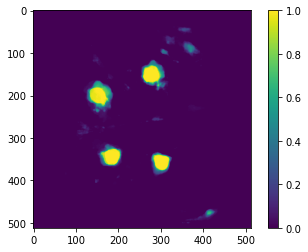

In [493]:
sum_stacks = np.sum(analysis_stack,axis=0)
sum_stacks.shape

sum_stacks = sum_stacks / (255*95)
sum_stacks = 1 - sum_stacks

plt.imshow(sum_stacks)
plt.colorbar()

np.max(labels):  4
curr_labels : [0 1 2 3 4]
len(regions) : 4
counts : [[979, 4], [1045, 3], [1132, 2], [1161, 1]]
area, label_num : 979 4
area, label_num : 1045 3
counts1 : [[1132, 2], [1161, 1]]
labels_unique : [0 1 2]


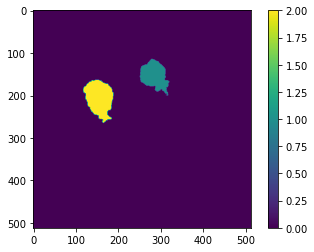

In [540]:
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

bin_img = np.where(sum_stacks > 0,True,False)
distance = ndi.distance_transform_edt(bin_img)

# If it doesn't find 4 good lesions, decrease threshold until it does (lesions must be > 500 pixels) 
good_start = False
min_lesions_over_thresh = float('inf')
best_labels = None
threshold = 1.0
for i in range(20):
    
    threshold -= 0.05
    starting_regions = np.where(sum_stacks>=threshold,1,0)
    labels = label(starting_regions)
    
    num_lesions = 0
    regions = skimage.measure.regionprops(labels)
    for region in regions:
        num_lesions += 1
    if num_lesions == 2:
        print('GoodSTART')
        good_start = True
        break
    else:
        if num_lesions < min_lesions_over_thresh and num_lesions >= 2:
            min_lesions_over_thresh = num_lesions
            best_labels = labels
    
if not good_start:
    labels = best_labels
    print('np.max(labels): ',np.max(labels))
    print('curr_labels :',np.unique(labels))
    counts = []
    # removed smallest regions until there is the correct number
    regions = skimage.measure.regionprops(labels)
    print('len(regions) :',len(regions))
    for region in regions:
        counts.append([region.area,region.label])
    counts.sort()
    print('counts :',counts)
    while len(counts) > 2:
        area,label_num = counts.pop(0)
        print('area, label_num :',area,label_num)
        labels = np.where(labels==label_num,0,labels)
        
    print('counts1 :',counts)
    labels_unique = np.unique(labels)
    print('labels_unique :',labels_unique)
    for i,lab_u in enumerate(labels_unique):
        labels = np.where(labels==lab_u,i,labels)
    
labs = watershed(-distance, labels, mask=bin_img)
plt.imshow(labs)
plt.colorbar()

No handles with labels found to put in legend.


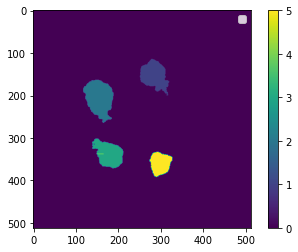

In [505]:
plt.imshow(labs)
plt.colorbar()
plt.legend()

In [502]:
from skimage.color import label2rgb

In [510]:
labs_rgb = label2rgb(labs,colors=['red','blue','green','black','purple'])

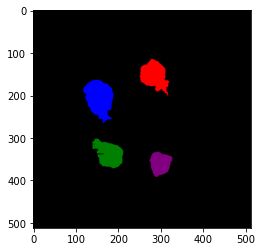

In [511]:
plt.imshow(labs_rgb)